(50000, 32, 32, 3)


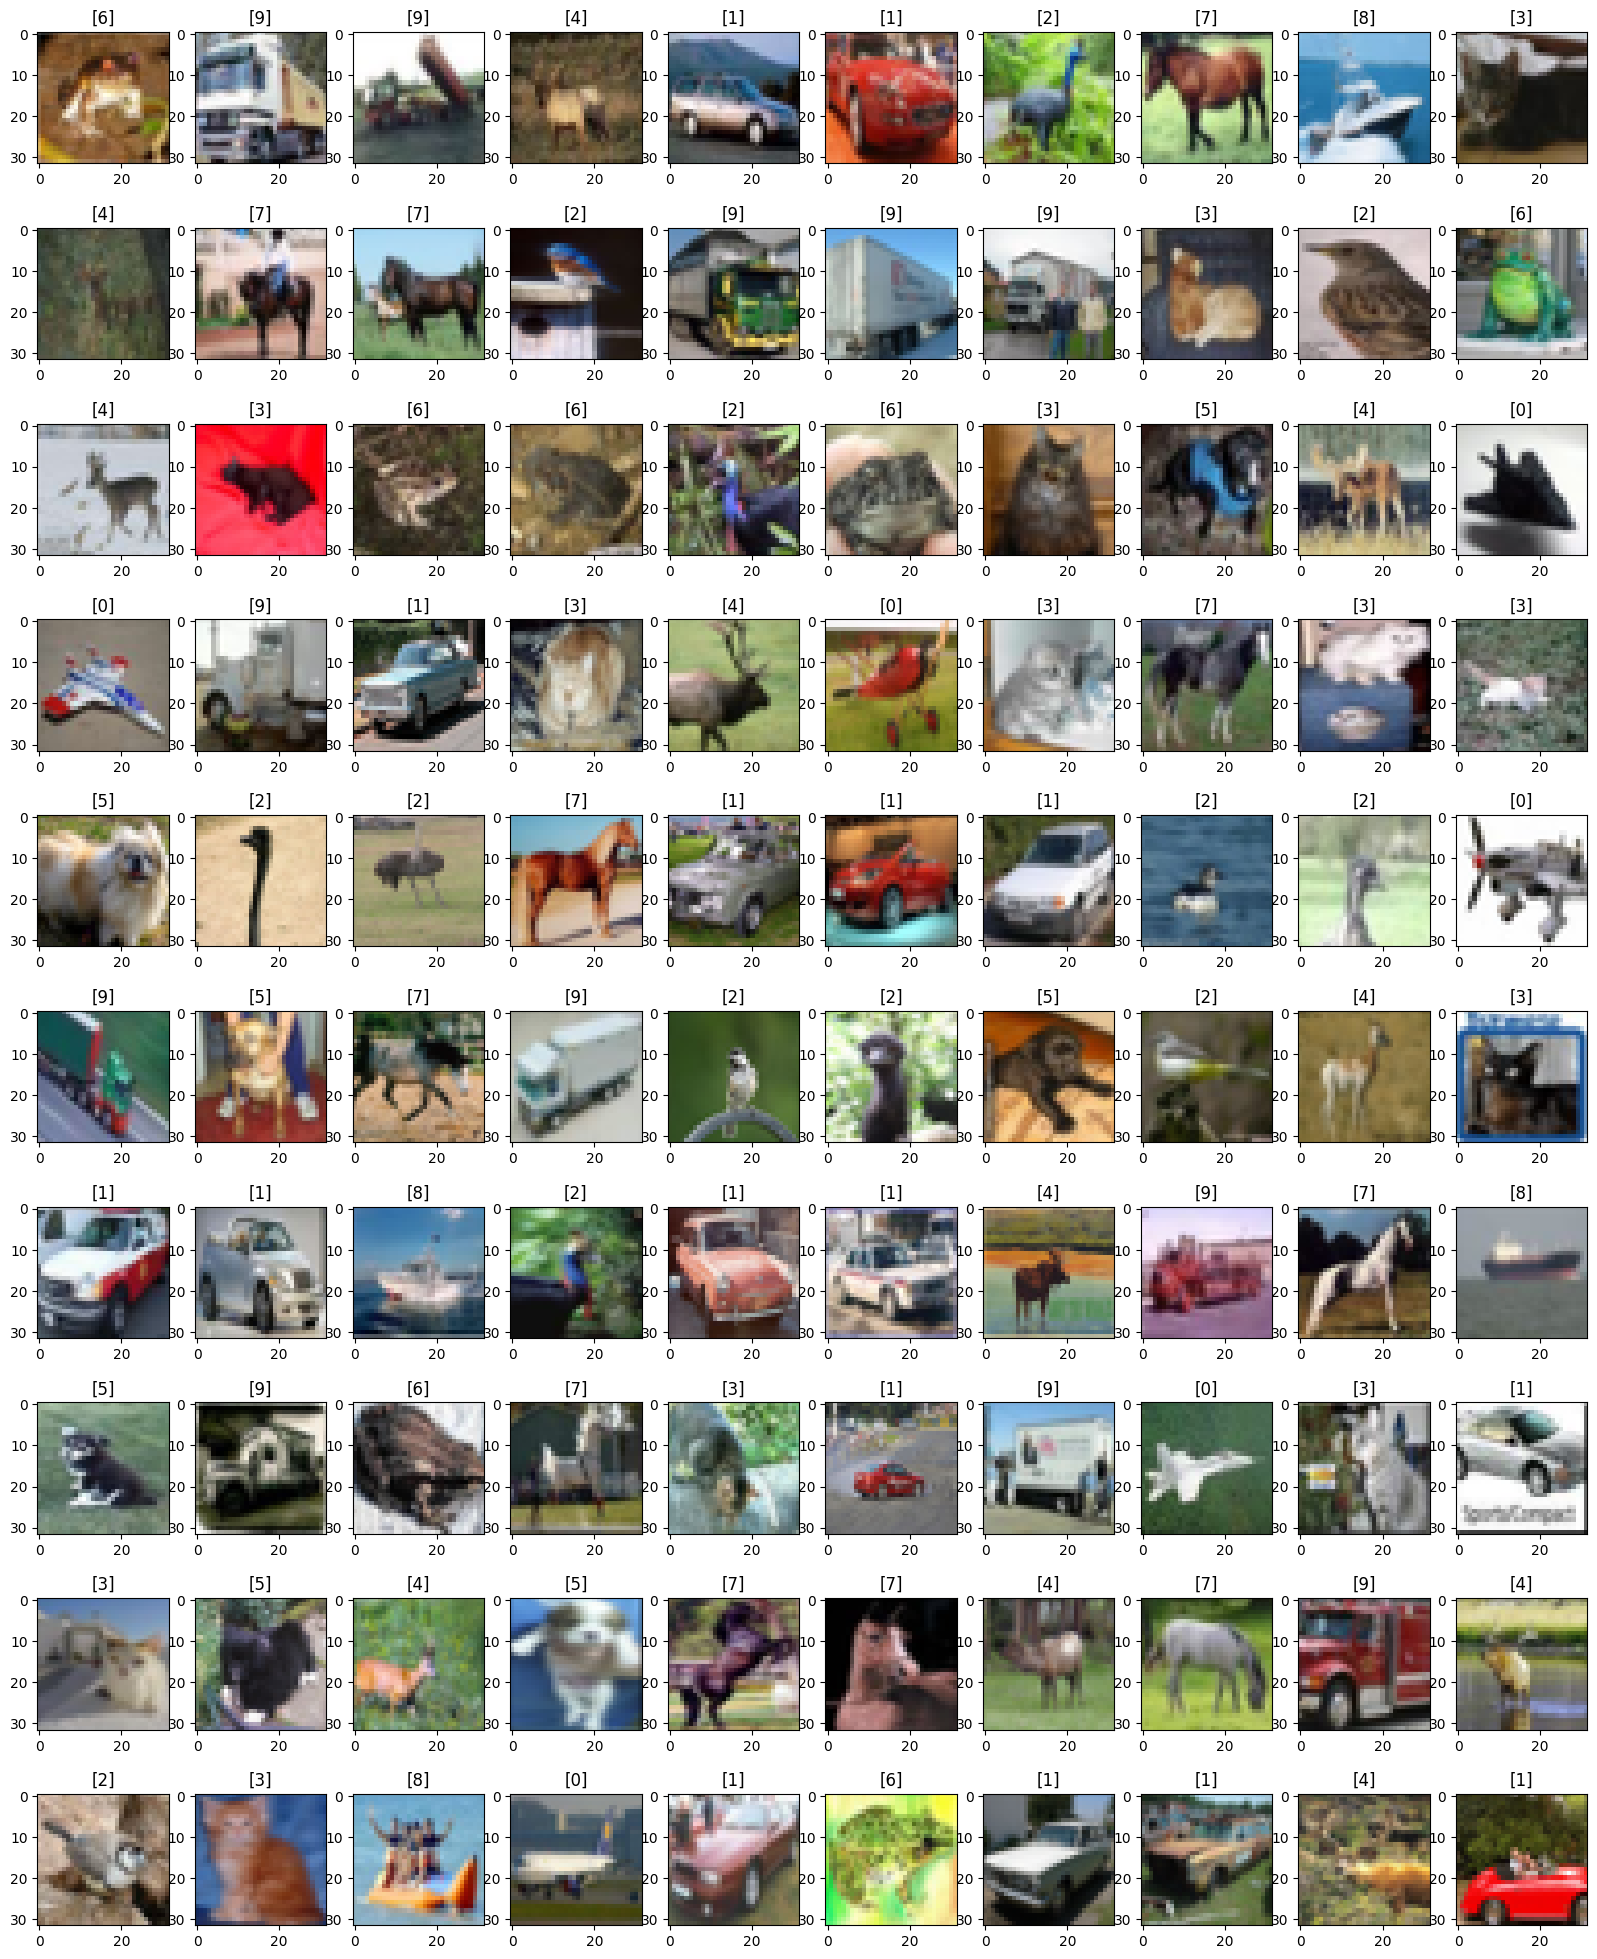

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(train_X, train_y), (val_X, val_y) = tf.keras.datasets.cifar10.load_data()

train_X = train_X.astype('float32') / 255
val_X = val_X.astype('float32') / 255

train_y_ = np.zeros((train_y.shape[0], 10))
train_y_[np.arange(train_y.shape[0]), train_y[:, 0]] = 1
val_y_ = np.zeros((val_y.shape[0], 10))
val_y_[np.arange(val_y.shape[0]), val_y[:, 0]] = 1

fig, axes = plt.subplots(ncols=10, nrows=10, figsize=(20, 25))

for i in range(100):
    axes[i // 10, i % 10].imshow(train_X[i])
    axes[i // 10, i % 10].set_title(train_y[i])
    
print(train_X.shape)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten


model = Sequential()

model.add(Conv2D(8, 5, input_shape=(32, 32, 3)))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(16, 5))
model.add(AveragePooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         608       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 8)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [16]:
history = model.fit(train_X, train_y_, validation_data=(val_X, val_y_), epochs=100, batch_size=256, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
196/196 [==============================] - 16s 75ms/step - loss: 1.9118 - auc_1: 0.7674 - val_loss: 1.7429 - val_auc_1: 0.8170
Epoch 2/100
196/196 [==============================] - 15s 76ms/step - loss: 1.6405 - auc_1: 0.8409 - val_loss: 1.5971 - val_auc_1: 0.8504
Epoch 3/100
196/196 [==============================] - 15s 76ms/step - loss: 1.5216 - auc_1: 0.8652 - val_loss: 1.4875 - val_auc_1: 0.8718
Epoch 4/100
196/196 [==============================] - 16s 79ms/step - loss: 1.4379 - auc_1: 0.8807 - val_loss: 1.4303 - val_auc_1: 0.8820
Epoch 5/100
196/196 [==============================] - 14s 73ms/step - loss: 1.3785 - auc_1: 0.8909 - val_loss: 1.3999 - val_auc_1: 0.8869
Epoch 6/100
196/196 [==============================] - 14s 72ms/step - loss: 1.3315 - auc_1: 0.8985 - val_loss: 1.3730 - val_auc_1: 0.8919
Epoch 7/100
196/196 [==============================] - 14s 73ms/step - loss: 1.2913 - auc_1: 0.9047 - val_loss: 1.3457 - val_auc_1: 0.8960
Epoch 8/100
196/196 [======

In [21]:
model.evaluate(val_X, val_y_)

313/313 [==============================] - 2s 7ms/step - loss: 1.3390 - auc_1: 0.9017


[1.339046597480774, 0.9017326831817627]

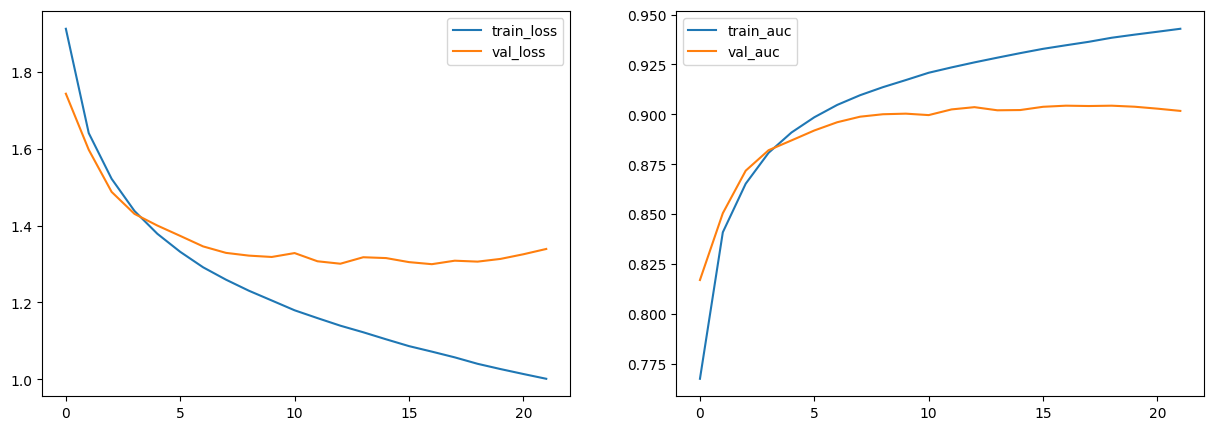

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.history['auc_1'], label='train_auc')
axes[1].plot(history.history['val_auc_1'], label='val_auc')
axes[1].legend()